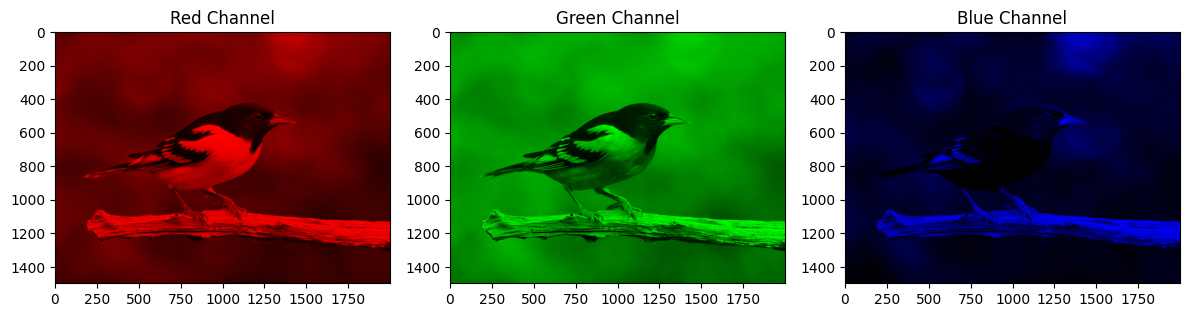

In [10]:
from PIL import Image, ImageOps
import numpy as np
import matplotlib.pyplot as plt
import colorsys
import random
from scipy.ndimage import uniform_filter
from skimage.color import rgb2gray
from skimage.filters import sobel
from scipy.ndimage import median_filter
import os

#Bai 1
img = Image.open('bird.png')
r, g, b = img.split()

red_img = Image.merge("RGB", (r, Image.new("L", r.size), Image.new("L", r.size)))
green_img = Image.merge("RGB", (Image.new("L", g.size), g, Image.new("L", g.size)))
blue_img = Image.merge("RGB", (Image.new("L", b.size), Image.new("L", b.size), b))

red_img.save("red.png")
green_img.save("green.png")
blue_img.save("blue.png")

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(red_img)
plt.title("Red Channel")
plt.axis("on")

plt.subplot(1, 3, 2)
plt.imshow(green_img)
plt.title("Green Channel")
plt.axis("on")

plt.subplot(1, 3, 3)
plt.imshow(blue_img)
plt.title("Blue Channel")
plt.axis("on")

plt.tight_layout()
plt.show()

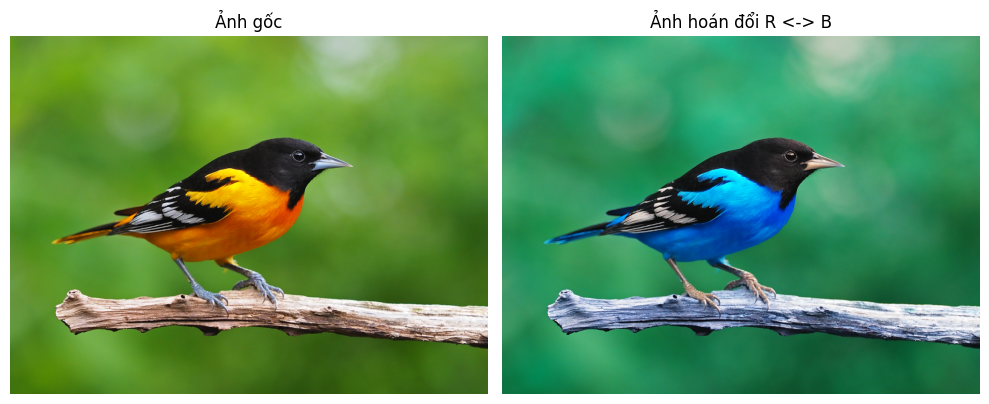

In [54]:
#Bai 2
img = Image.open("bird.png")
r, g, b = img.split()
swapped = Image.merge("RGB", (b, g, r))
swapped.save("swapped.png")

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title("Ảnh gốc")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(swapped)
plt.title("Ảnh hoán đổi R <-> B")
plt.axis("off")

plt.tight_layout()
plt.show()


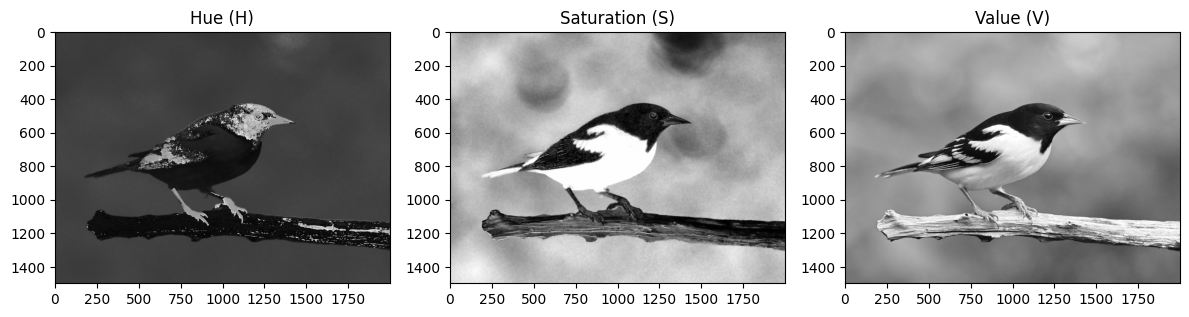

In [12]:
#Bai 3
img = Image.open("bird.png")
arr = np.array(img).astype("float32") / 255

hsv = np.zeros_like(arr)

for i in range(arr.shape[0]):
    for j in range(arr.shape[1]):
        hsv[i, j] = colorsys.rgb_to_hsv(*arr[i, j])

h = (hsv[:, :, 0] * 255).astype('uint8')
s = (hsv[:, :, 1] * 255).astype('uint8')
v = (hsv[:, :, 2] * 255).astype('uint8')

Image.fromarray(h).save("hue.png")
Image.fromarray(s).save("saturation.png")
Image.fromarray(v).save("value.png")

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(h, cmap='gray')
plt.title("Hue (H)")
plt.axis("on")

plt.subplot(1, 3, 2)
plt.imshow(s, cmap='gray')
plt.title("Saturation (S)")
plt.axis("on")

plt.subplot(1, 3, 3)
plt.imshow(v, cmap='gray')
plt.title("Value (V)")
plt.axis("on")

plt.tight_layout()
plt.show()

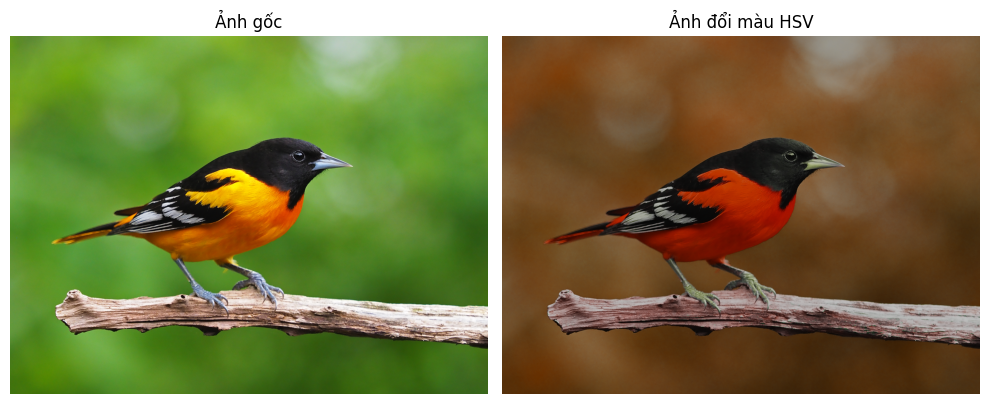

In [53]:
#Bai 4
img = Image.open("bird.png")
arr = np.array(img).astype("float32") / 255

hsv = np.zeros_like(arr)
for i in range(arr.shape[0]):
    for j in range(arr.shape[1]):
        hsv[i, j] = colorsys.rgb_to_hsv(*arr[i, j])

# Thay đổi H và V
hsv[:, :, 0] /= 3         # Giảm hue
hsv[:, :, 2] *= 0.75      # Giảm độ sáng

rgb = np.zeros_like(hsv)
for i in range(arr.shape[0]):
    for j in range(arr.shape[1]):
        rgb[i, j] = colorsys.hsv_to_rgb(*hsv[i, j])

rgb_img = Image.fromarray((rgb * 255).astype('uint8'))
rgb_img.save("hsv_doimau.png")

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title("Ảnh gốc")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(rgb_img)
plt.title("Ảnh đổi màu HSV")
plt.axis("off")

plt.tight_layout()
plt.show()

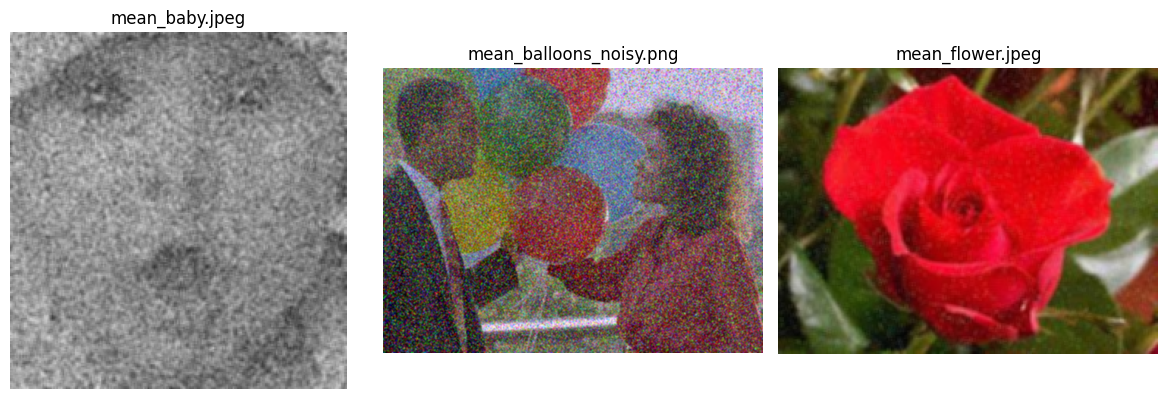

In [ ]:
#Bai 5
folder = "Exercise"
output_folder = "Exercise_MeanFiltered"
os.makedirs(output_folder, exist_ok=True)

images_to_show = []  

for filename in os.listdir(folder):
    if filename.endswith(".png") or filename.endswith(".jpg") or filename.endswith(".jpeg"):
        path = os.path.join(folder, filename)
        img = Image.open(path)
        arr = np.array(img)

        blur = uniform_filter(arr, size=(3, 3, 1))
        blur_img = Image.fromarray(blur.astype("uint8"))

        # Lưu ảnh
        out_path = os.path.join(output_folder, f"mean_{filename}")
        blur_img.save(out_path)

        images_to_show.append((blur_img, f"mean_{filename}"))

        if len(images_to_show) == 3:
            plt.figure(figsize=(12, 4))
            for i, (img_show, title) in enumerate(images_to_show):
                plt.subplot(1, 3, i + 1)
                plt.imshow(img_show)
                plt.title(title)
                plt.axis("off")
            plt.tight_layout()
            plt.show()
            images_to_show = []  # reset

if images_to_show:
    plt.figure(figsize=(12, 4))
    for i, (img_show, title) in enumerate(images_to_show):
        plt.subplot(1, 3, i + 1)
        plt.imshow(img_show)
        plt.title(title)
        plt.axis("off")
    plt.tight_layout()
    plt.show()

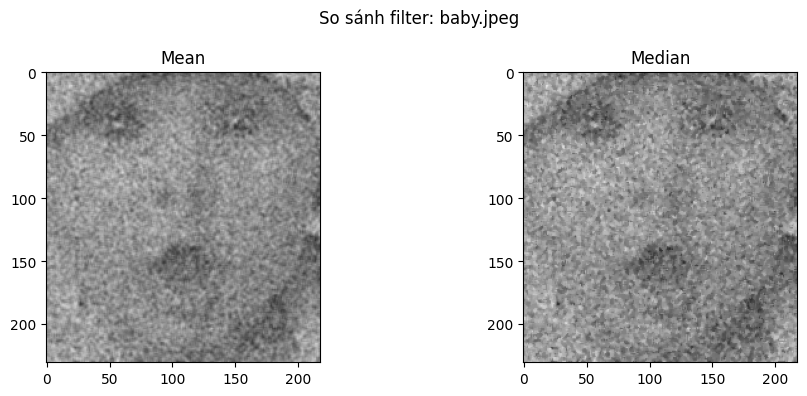

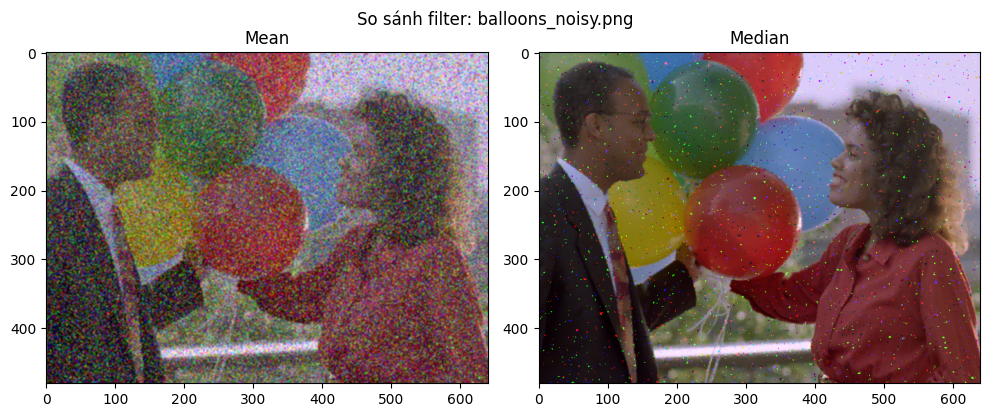

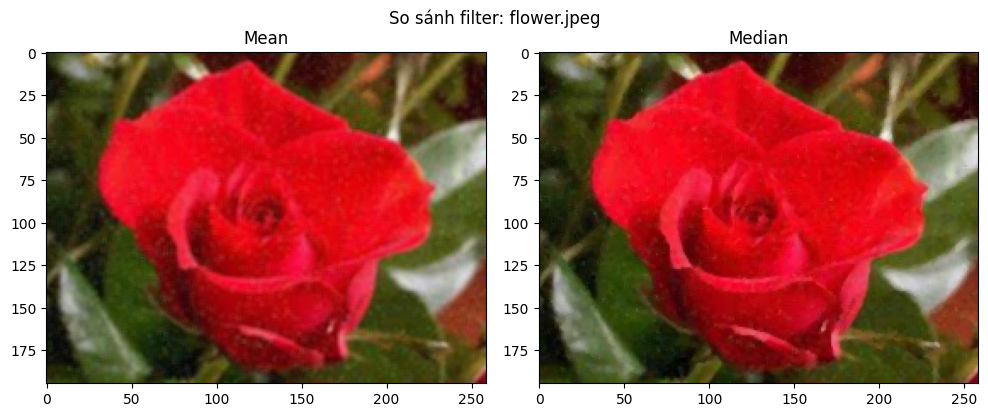

In [22]:
#Bai 6

folder = "Exercise"
output_folder = "Exercise_FilterCompare"
os.makedirs(output_folder, exist_ok=True)

for filename in os.listdir(folder):
    if filename.endswith(".png") or filename.endswith(".jpg") or filename.endswith(".jpeg"):
        path = os.path.join(folder, filename)
        img = Image.open(path)
        arr = np.array(img)

        mean_img = uniform_filter(arr, size=(3, 3, 1))
        mean_img = Image.fromarray(mean_img.astype("uint8"))
        mean_img.save(os.path.join(output_folder, f"mean_{filename}"))

        median_img = median_filter(arr, size=(3, 3, 1))
        median_img = Image.fromarray(median_img.astype("uint8"))
        median_img.save(os.path.join(output_folder, f"median_{filename}"))

        plt.figure(figsize=(10, 4))
        plt.subplot(1, 2, 1)
        plt.imshow(mean_img)
        plt.title("Mean")
        plt.axis("on")

        plt.subplot(1, 2, 2)
        plt.imshow(median_img)
        plt.title("Median")
        plt.axis("on")

        plt.suptitle(f"So sánh filter: {filename}")
        plt.tight_layout()
        plt.show()

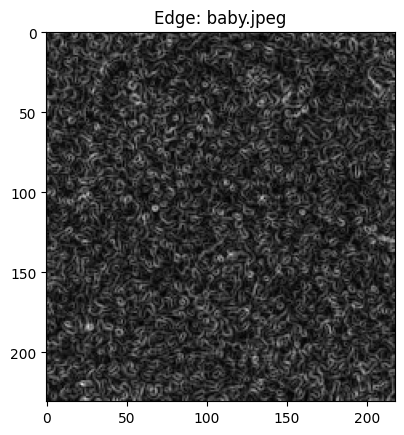

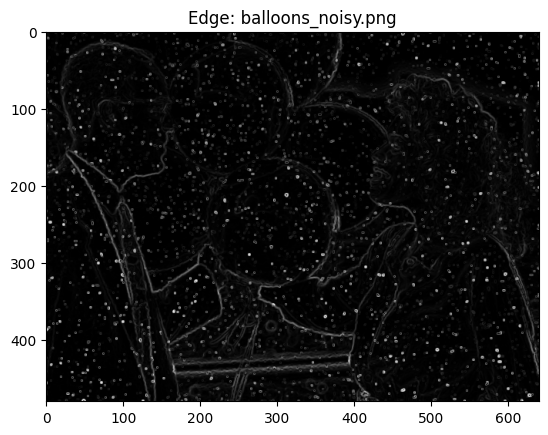

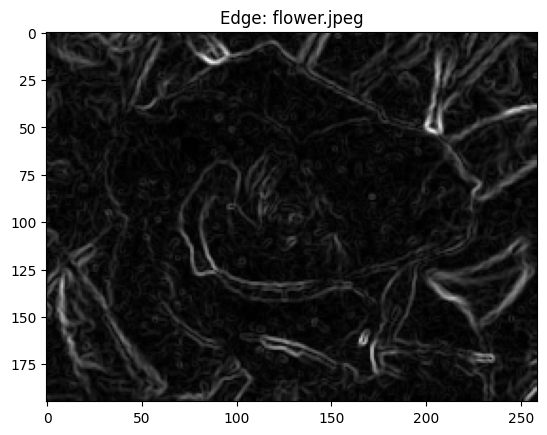

In [16]:
#Bai 7

input_dir = "Exercise"
output_dir = "Exercise_edges"
os.makedirs(output_dir, exist_ok=True)

for file in os.listdir(input_dir):
    if file.lower().endswith(('.png', '.jpg' ,'jpeg')):
        input_path = os.path.join(input_dir, file)
        output_path = os.path.join(output_dir, "edge_" + file)

        img = Image.open(input_path)
        arr = np.array(img)
        denoised = median_filter(arr, size=(3, 3, 1))

        gray = rgb2gray(denoised)
        edges = sobel(gray)

        plt.imsave(output_path, edges, cmap="gray")

        plt.imshow(edges, cmap="gray")
        plt.title("Edge: " + file)
        plt.axis("on")
        plt.show()

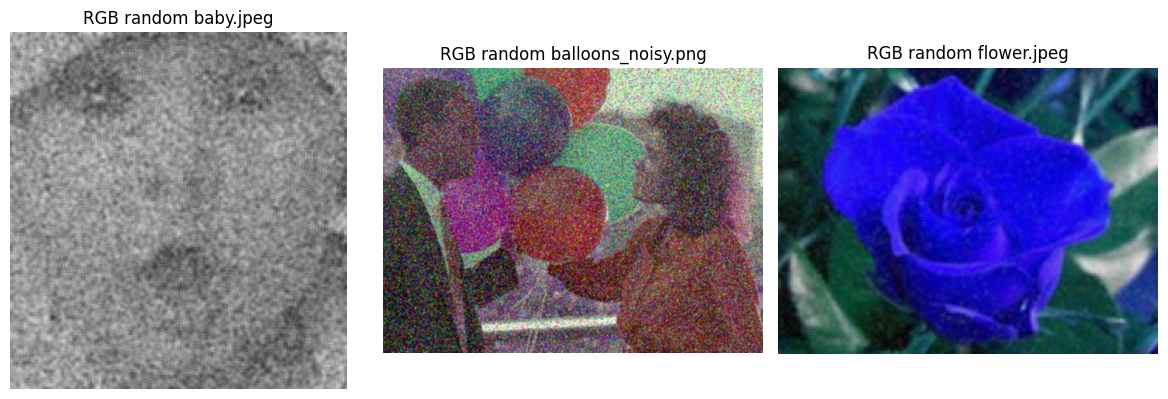

In [51]:
#Bai 8
input_dir = "Exercise"
output_dir = "Exercise_RGB_Shuffled"
os.makedirs(output_dir, exist_ok=True)

images_to_show = []

for filename in os.listdir(input_dir):
    if filename.endswith(".png") or filename.endswith(".jpg") or filename.endswith(".jpeg"):
        path = os.path.join(input_dir, filename)
        img = Image.open(path)
        arr = np.array(img)

        denoised = uniform_filter(arr, size=(3, 3, 1))
        ch = [0, 1, 2]
        random.shuffle(ch)
        shuffled = denoised[:, :, ch]

        out_path = os.path.join(output_dir, f"rgb_random_{filename}")
        Image.fromarray(shuffled.astype("uint8")).save(out_path)

        images_to_show.append((shuffled, f"RGB random {filename}"))

        if len(images_to_show) == 3:
            plt.figure(figsize=(12, 4))
            for i, (img_show, title) in enumerate(images_to_show):
                plt.subplot(1, 3, i + 1)
                plt.imshow(img_show)
                plt.title(title)
                plt.axis("off")
            plt.tight_layout()
            plt.show()
            images_to_show = []

if images_to_show:
    plt.figure(figsize=(12, 4))
    for i, (img_show, title) in enumerate(images_to_show):
        plt.subplot(1, 3, i + 1)
        plt.imshow(img_show)
        plt.title(title)
        plt.axis("on")
    plt.tight_layout()
    plt.show()

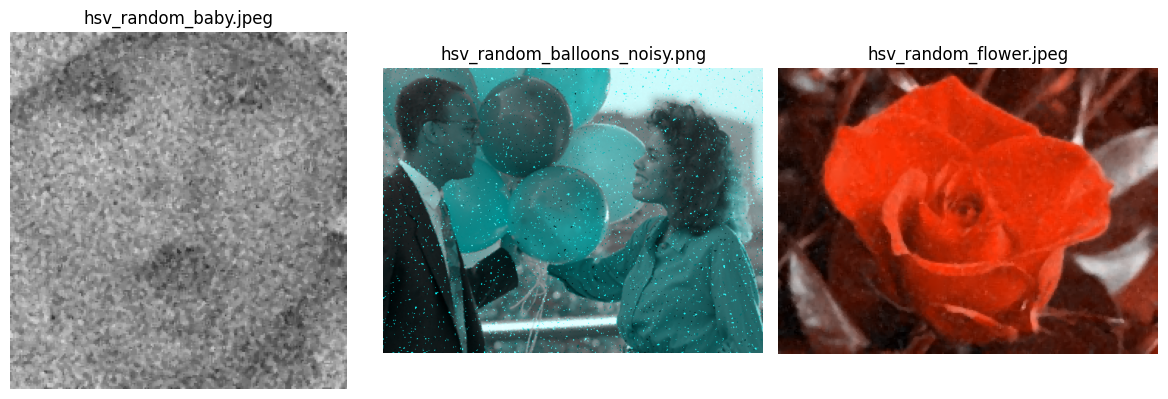

In [ ]:
#Bai 9
input_dir = "Exercise"
output_dir = "Exercise_HSV_Shuffled"
os.makedirs(output_dir, exist_ok=True)

used_hues = []

def generate_unique_hue():
    """Sinh hue ngẫu nhiên và không trùng với các hue đã dùng"""
    while True:
        new_hue = np.random.rand()
        if all(abs(new_hue - h) > 0.05 for h in used_hues):  #Time
            used_hues.append(new_hue)
            return new_hue

images_to_show = []

for filename in os.listdir(input_dir):
    if filename.endswith(".png") or filename.endswith(".jpg") or filename.endswith(".jpeg"):
        path = os.path.join(input_dir, filename)
        img = Image.open(path).convert("RGB")
        arr = np.array(img).astype("float32") / 255

        # Khử nhiễu bằng median filter
        denoised = median_filter(arr, size=(3, 3, 1))

        # Chuyển sang HSV
        hsv = np.zeros_like(denoised)
        for i in range(denoised.shape[0]):
            for j in range(denoised.shape[1]):
                hsv[i, j] = colorsys.rgb_to_hsv(*denoised[i, j])

        unique_hue = generate_unique_hue()
        hsv[:, :, 0] = unique_hue 

        rgb = np.zeros_like(hsv)
        for i in range(hsv.shape[0]):
            for j in range(hsv.shape[1]):
                rgb[i, j] = colorsys.hsv_to_rgb(*hsv[i, j])

        rgb_img = Image.fromarray((rgb * 255).astype("uint8"))
        out_path = os.path.join(output_dir, f"hsv_random_{filename}")
        rgb_img.save(out_path)

        images_to_show.append((rgb_img, f"hsv_random_{filename}"))

        if len(images_to_show) == 3:
            plt.figure(figsize=(12, 4))
            for i, (im, title) in enumerate(images_to_show):
                plt.subplot(1, 3, i + 1)
                plt.imshow(im)
                plt.title(title)
                plt.axis("off")
            plt.tight_layout()
            plt.show()
            images_to_show = []

if images_to_show:
    plt.figure(figsize=(12, 4))
    for i, (im, title) in enumerate(images_to_show):
        plt.subplot(1, 3, i + 1)
        plt.imshow(im)
        plt.title(title)
        plt.axis("on")
    plt.tight_layout()
    plt.show()
